## Finding the Root (Zero) of a Function

Finding the root, or zero, of a function is a very common task in exploratory computing. This Notebook presents the Bisection method and Newton's method for finding the root, or 0, of a function. 

In [9]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import nbinteract as nbi

x = np.linspace(0,10, 100)

def sine_func(x, w, amp):
    return amp*np.sin(w*x)

# @widgets.interact(w=(0, 4, 0.01), amp=(0, 4, .1))
# def update(w = 1, amp = 1):
#     plt.clf()
#     plt.ylim(-4, 4)
#     plt.plot(x, sine_func(x, w, amp))
def normal(mean, sd):
    '''Returns 1000 points drawn at random fron N(mean, sd)'''
    return np.random.normal(mean, sd, 10000)

# Plot aesthetics
options = {
    'xlim': (-2, 12),
    'ylim': (0, 0.7),
    'bins': 100
}

# Pass in the `normal` function and let user change mean and sd.
# Whenever the user interacts with the sliders, the `normal` function
# is called and the returned data are plotted.
nbi.hist(normal, mean=(0, 10), sd=(0, 2.0), options=options)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
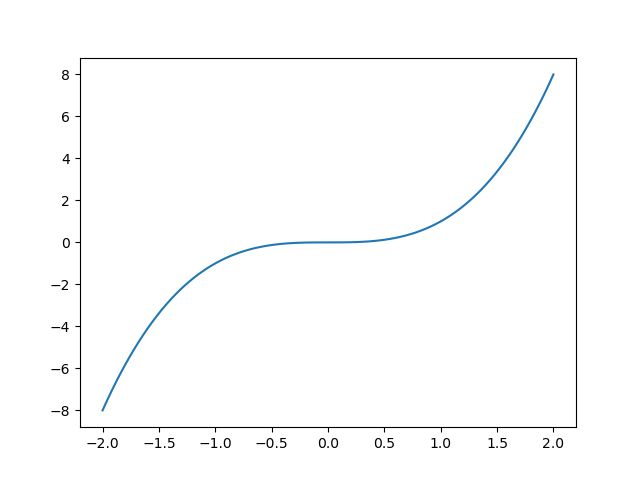

In [12]:
def f(x):
    return x**3

x = np.linspace(-2, 2, 100)
y = f(x)
plt.axhline(0, ls='--', c='r')
plt.clf()
plt.plot(x, y)
plt.show()

### Bisection method
Given a continuous function $f(x)$ and two values of $x_1$, $x_2$ such that $f(x_1)$ and $f(x_2)$ have opposite signs the Bisection method is a root-finding method that repeatedly bisects the interval $[x_1, x_2]$ and then selects a subinterval (in which a root must be) for further processing. (Since $f(x_1)$ and $f(x_2)$ have opposite signs, it follows that $f(x)$ is zero somewhere between $x_1$ and $x_2$.) The Bisection method iterate towards the zero of the function by cutting the root search interval in half at every iteration. The method calculates the middle point $x_m$ between $x_1$ and $x_2$ and compute $f(x_m)$ and then replaces either $x_1$ or $x_2$ by $x_m$ such the values of $f$ at the end points of the interval are of opposite signs. The process is repeated until the interval is small enough that its middle point can be considered a good approximation of the root of the function. In summary, the algorithm works as follows:

1. Compute $f(x_1)$ and $f(x_2)$ 
2. Compute $x_m = \frac{1}{2}(x_1 + x_2)$.
3. Compute $f(x_m)$.
4. If $f(x_m)f(x_2) < 0$, replace $x_1$ by $x_m$, otherwise, replace $x_2$ by $x_m$.
5. If $|x_1 - x_2|<\varepsilon$, where $\varepsilon$ is a user-specified tolerance, return $\frac{1}{2}(x_1 + x_2)$, otherwise return to step 2.

In [ ]:
def exponential_function(x):
    return 0.5 - np.exp(-x)

x = np.linspace(0, 4, 100)
y = exponential_function(x)
plt.plot(x, y)
plt.axhline(0, color='r', ls='--')

### Implementation of the Bisection method
We implement the bisection method as a function called `bisection` which takes as arguments:

1. The function for which we want to find the root.
2. $x_1$ and $x_2$
3. The tolerance `tol` to be used as a stopping criterion (by default 0.001).
4. The maximum number of iterations `nmax`. Make `nmax` a keyword argument with a default value of, for example, 10.

Our function returns the value of $x$ where $f(x)$ is (approximately) zero, or print a warning if the maximum number of iterations is reached before the tolerance is met.

Steps 2-5 of the algorithm explained above are implemented as a loop to be run until the tolerance level is met, at most `nmax` times. 


In [ ]:
def bisection(func, x1, x2, tol=1e-3, nmax=10, silent=True):
    f1 = func(x1)
    f2 = func(x2)
    assert f1 * f2< 0, 'Error: zero not in interval x1-x2'
    for i in range(nmax):
        ### START CODE HERE
        xm = 0.5*(x1+x2)
        if func(xm)*f2<0:
            x1 = xm
        else:
            x2=xm
        f1 = func(x1)
        f2 = func(x2)
        
        ### END CODE HERE
        if abs(x1 - x2) < tol:
            break
    if abs(func(x1)) > tol:
        print('Maximum number of iterations reached')
    return x1

In [ ]:
x1 = 0 
x2 = 1 
function = exponential_function
xzero = bisection(function, x1, x2, tol=1e-4, nmax=20, silent=True) 
print ("The root of exponential_function between %.2f and %.2f is %f" % (x1, x2, xzero))
print ("The value of the function at the 'root' is %f" % exponential_function(xzero))

and of $cos$  between 0 and 3.

In [ ]:
x1 = 0 
x2 = 3 
function = np.cos
root = bisection(function, 0, 3, tol=1e-6, nmax=30)
print ("The root of cos between %.2f and %.2f is %f" % (x1, x2, root))

The Bisection method is a brute-force method guaranteed to find a root of a continuous function $f$ on an interval $(x_1,x_2)$, if $(x_1,x_2)$ contains a root for $f$. The Bisection method is not very efficient and it requires a search interval that contains only one root. 

An alternative is Newton's method (also called the Newton-Raphson method). Consider the graph below. To find the root of the function represented by the blue line, Newton's method starts at a user-defined starting location, $x_0$ (the blue dot) and fits a straight line through the point $(x,y)=(x_0,f(x_0))$ in such a way that the line is tangent to $f(x)$ at $x_0$ (the red line). The intersection of the red line with the horizontal axis is the next estimate $x_1$ of the root of the function (the red dot). This process is repeated until a value of $f(x)$ is found that is sufficiently close to zero (within a specified tolerance), i.e., a straight line is fitted through the point $(x,y)=(x_1,f(x_1))$, tangent to the function, and the the next estimate of the root of the function is taken as the intersection of this line with the horizontal axis, until the value of f at the root estimate is very close to 0.
Unfortunately, not guaranteed that it always works, as is explained below. 


<img src="http://i.imgur.com/tK1EOtD.png" alt="Newton's method on wikipedia">

The equation for a straight line with slope $a$ through the point $x_n,f(x_n)$ is:

$$y = a(x-x_n) + f(x_n)$$

For the line to be tangent to the function $f(x)$ at the point $x=x_n$, the slope $a$ has to equal the derivative of $f(x)$ at $x_n$: $a=f'(x_n)$. The intersection of the line with the horizontal axis is the value of $x$ that results in $y=0$ and this is the next estimate $x_{n+1}$ of the root of the function. In order to find this estimate we need to solve:

$$0 = f'(x_n) (x_{n+1}-x_n) + f(x_n)$$

which gives

$$\boxed{x_{n+1} = x_n - f(x_n)/f'(x_n)}$$

The search for the root is completed when $|f(x)|$ is below a user-specified tolerance.

An animated illustration of Newton's method can be found on <img src="http://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" alt="Newton's method on wikipedia" width="400px">
<!-- [Wikipedia](http://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif) -->

Newton's method is guaranteed to find the root of a function if the function is *well behaved* and the search starts *close enough* to the root. If those two conditions are met, Newton's method is very fast, but if they are not met, the method is not guaranteed to converge to the root. 

Another disadvantage of Newton's method is that we need to define the derivative of the function. 

Note that the function value does not necessarily go down at every iteration (as illustated in the animation above).

### Newton's Method Implementation 
We implement Newton's method as function `newtonsmethod` that takes in the following arguments:

1. The function for which to find the root.
2. The derivative of the function.
3. The starting point of the search $x_0$.
4. The tolerance `tol` used as a stopping criterion, by default $10^{-6}$.
5. The maximum number of iterations `nmax`, by default 10.

`newtonsmethod` returns the value of $x$ where $f(x)$ is (approximately) zero or prints a message if the maximum number of iterations is reached before the tolerance is met. 


In [ ]:
def newtonsmethod(func, funcp, xs, tol=1e-6, nmax=10, silent=True):
    
    f = func(xs)
    fp = funcp(xs)
    for i in range(nmax):
        ### START CODE HERE
        f = func(xs)
        fp = funcp(xs)
        xs -= f/fp
        
        ### END CODE HERE
        if silent is False: print(xs, func(xs))
        if abs(f) < tol: 
            return (xs,i+1)
            break
    if abs(f) > tol:
        #print('Max number of iterations reached before convergence')
        return (None, -1)

We test `newtonsmethod` by finding the root of $f(x)=\frac{1}{2}-\text{e}^{-x}$ using $x_0=1$ as the starting point of the search. How many iterations do we need if we start at $x=4$?

In [ ]:
def fp(x):
    return np.exp(-x)

xs = 1
func = exponential_function
funcp = fp
tol = 1e-6
nmax = 10

xzero, iterations = newtonsmethod(func, funcp, xs, tol, nmax)
print("First Example")
if xzero != None:
    print("Starting search from x = %.2f" % xs)
    print("root at x = %f, exponential_function(root) = %f" % (xzero, exponential_function(xzero)))
    print("tolerance reached in %d iterations" % iterations)
else: 
    print("Starting search from x = %.2f" % xs)
    print('Max number of iterations reached before convergence')

print("")

   
xs = 4
nmax = 50

xzero, iterations = newtonsmethod(func, funcp, xs, tol, nmax)

print("Second Example") 
if xzero != None:    
    print("Starting search from x = %.2f" % xs)
    print("root at x = %f, exponential_function(root) = %f" % (xzero, exponential_function(xzero)))
    print("tolerance reached in %d iterations" % iterations)
else: 
    print("Starting search from x = %.2f" % xs)
    print('Max number of iterations reached before convergence')